##Importing Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

##Data Collection

In [70]:
data = pd.read_csv('/content/train.csv')
stores = pd.read_csv('/content/stores.csv')
features = pd.read_csv('/content/features.csv')

<ipython-input-70-4fa7e28a52fd>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/train.csv')


In [71]:
data.shape

(309679, 5)

In [72]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [73]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
309674,32,44,2012-08-24,4533.20,False
309675,32,44,2012-08-31,3767.29,False
309676,32,44,2012-09-07,4152.52,True
309677,32,44,2012-09-14,4394.31,False
309678,32,44,2012-09-21,42.00,NaN


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309679 entries, 0 to 309678
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         309679 non-null  int64  
 1   Dept          309679 non-null  int64  
 2   Date          309679 non-null  object 
 3   Weekly_Sales  309679 non-null  float64
 4   IsHoliday     309678 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ MB


In [75]:
stores.shape

(45, 3)

In [76]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [77]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [78]:
features.shape

(8190, 12)

In [79]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [80]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


##Data Pre_Processing

In [81]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [82]:
features.MarkDown1 = features.MarkDown1.fillna(value=features.MarkDown1.median())
features.MarkDown2 = features.MarkDown2.fillna(value=features.MarkDown2.median())
features.MarkDown3 = features.MarkDown3.fillna(value=features.MarkDown3.median())
features.MarkDown4 = features.MarkDown4.fillna(value=features.MarkDown4.median())
features.MarkDown5 = features.MarkDown5.fillna(value=features.MarkDown5.median())
features.CPI = features.CPI.fillna(value=features.CPI.median())
features.Unemployment = features.Unemployment.fillna(value=features.Unemployment.median())

In [83]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [84]:
data = pd.merge(data,stores,on='Store',how='left')

In [85]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [86]:
data['Date'] = pd.to_datetime(data['Date'])

In [87]:
data.sort_values(by=['Date'],inplace=True)

In [88]:
data.set_index(data.Date, inplace=True)

In [89]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

False

In [90]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309679 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         309679 non-null  int64         
 1   Dept          309679 non-null  int64         
 2   Date          309679 non-null  datetime64[ns]
 3   Weekly_Sales  309679 non-null  float64       
 4   Type          309679 non-null  object        
 5   Size          309679 non-null  int64         
 6   Temperature   309679 non-null  float64       
 7   Fuel_Price    309679 non-null  float64       
 8   MarkDown1     309679 non-null  float64       
 9   MarkDown2     309679 non-null  float64       
 10  MarkDown3     309679 non-null  float64       
 11  MarkDown4     309679 non-null  float64       
 12  MarkDown5     309679 non-null  float64       
 13  CPI           309679 non-null  float64       
 14  Unemployment  309679 non-null  float64       
 15  I

In [91]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False
2010-02-05,14,51,2010-02-05,12.00,A,200898,27.31,2.784,4743.58,364.57,36.26,1176.425,2727.135,181.871190,8.992,False
2010-02-05,26,72,2010-02-05,69498.23,A,152513,9.55,2.788,4743.58,364.57,36.26,1176.425,2727.135,131.527903,8.488,False
2010-02-05,23,33,2010-02-05,10369.10,B,114533,15.25,2.788,4743.58,364.57,36.26,1176.425,2727.135,131.527903,5.892,False
2010-02-05,14,52,2010-02-05,2425.30,A,200898,27.31,2.784,4743.58,364.57,36.26,1176.425,2727.135,181.871190,8.992,False


In [92]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [93]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month
Date,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False,2010,2
2010-02-05,14,51,2010-02-05,12.00,A,200898,27.31,2.784,4743.58,364.57,36.26,1176.425,2727.135,181.871190,8.992,False,2010,2
2010-02-05,26,72,2010-02-05,69498.23,A,152513,9.55,2.788,4743.58,364.57,36.26,1176.425,2727.135,131.527903,8.488,False,2010,2
2010-02-05,23,33,2010-02-05,10369.10,B,114533,15.25,2.788,4743.58,364.57,36.26,1176.425,2727.135,131.527903,5.892,False,2010,2
2010-02-05,14,52,2010-02-05,2425.30,A,200898,27.31,2.784,4743.58,364.57,36.26,1176.425,2727.135,181.871190,8.992,False,2010,2


In [94]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       25
dtype: int64

In [95]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [96]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,IsHoliday,Year,Month,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,4743.58,364.57,...,211.096358,8.106,False,2010,2,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,29,52,2010-02-05,1050.92,B,93638,24.36,2.788,4743.58,364.57,...,131.527903,10.064,False,2010,2,1701.59,510.26,959.371469,919.58,244.646500
2010-02-05,5,7,2010-02-05,4401.08,B,34875,39.70,2.572,4743.58,364.57,...,211.653972,6.566,False,2010,2,29195.62,3161.84,6124.484336,5005.53,3914.641292
2010-02-05,3,91,2010-02-05,166.19,B,37392,45.71,2.572,4743.58,364.57,...,214.424881,7.368,False,2010,2,867.02,65.04,318.685594,302.71,144.413199
2010-02-05,30,60,2010-02-05,915.20,C,42988,39.05,2.572,4743.58,364.57,...,210.752605,8.324,False,2010,2,1900.80,325.60,696.250350,642.40,235.916337


In [97]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [98]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,False,2010,2,57592.12,14537.37,22513.322937,18535.48,9854.349032,9047.97
2010-02-05,29,52,2010-02-05,1050.92,B,93638,24.36,2.788,131.527903,10.064,False,2010,2,1701.59,510.26,959.371469,919.58,244.646500,9047.97
2010-02-05,5,7,2010-02-05,4401.08,B,34875,39.70,2.572,211.653972,6.566,False,2010,2,29195.62,3161.84,6124.484336,5005.53,3914.641292,9047.97
2010-02-05,3,91,2010-02-05,166.19,B,37392,45.71,2.572,214.424881,7.368,False,2010,2,867.02,65.04,318.685594,302.71,144.413199,9047.97
2010-02-05,30,60,2010-02-05,915.20,C,42988,39.05,2.572,210.752605,8.324,False,2010,2,1900.80,325.60,696.250350,642.40,235.916337,9047.97


In [99]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [100]:
data.shape

(309654, 19)

In [101]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(275834, 19)

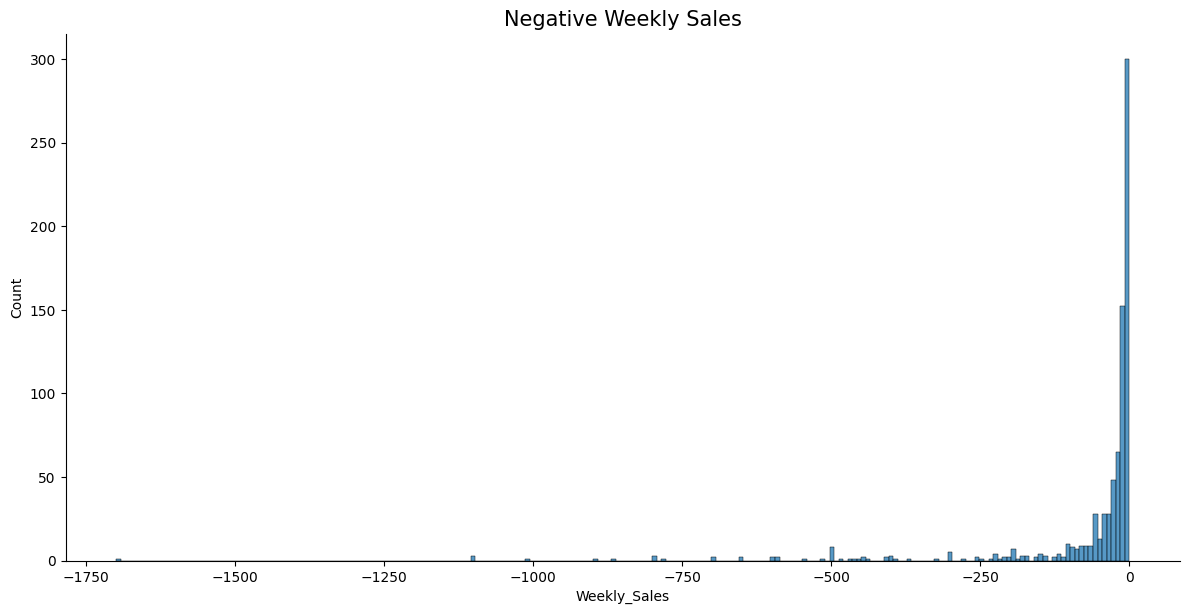

In [102]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In [103]:
data=data[data['Weekly_Sales']>=0]

In [104]:
data.shape

(275026, 19)

In [105]:
data['IsHoliday'] = data['IsHoliday'].astype('int')
data

<ipython-input-105-2fd6f7315588>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsHoliday'] = data['IsHoliday'].astype('int')


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,57592.12,14537.37,22513.322937,18535.48,9854.349032,9047.970
2010-02-05,29,52,2010-02-05,1050.92,B,93638,24.36,2.788,131.527903,10.064,0,2010,2,1701.59,510.26,959.371469,919.58,244.646500,9047.970
2010-02-05,5,7,2010-02-05,4401.08,B,34875,39.70,2.572,211.653972,6.566,0,2010,2,29195.62,3161.84,6124.484336,5005.53,3914.641292,9047.970
2010-02-05,3,91,2010-02-05,166.19,B,37392,45.71,2.572,214.424881,7.368,0,2010,2,867.02,65.04,318.685594,302.71,144.413199,9047.970
2010-02-05,30,60,2010-02-05,915.20,C,42988,39.05,2.572,210.752605,8.324,0,2010,2,1900.80,325.60,696.250350,642.40,235.916337,9047.970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,30,1,2012-10-26,12863.85,C,42988,70.50,3.506,223.078337,6.170,0,2012,10,22380.12,6951.80,9788.376643,9164.01,2373.532654,1732.725
2012-10-26,32,3,2012-10-26,11839.77,A,203007,47.22,3.686,199.219532,7.557,0,2012,10,63684.54,8763.66,15472.540140,11469.56,10889.635668,11630.340
2012-10-26,19,55,2012-10-26,10844.43,A,203819,56.49,4.071,138.728161,7.992,0,2012,10,72836.92,5447.56,13923.061538,10974.40,10270.823373,8127.190


##Data Visualization

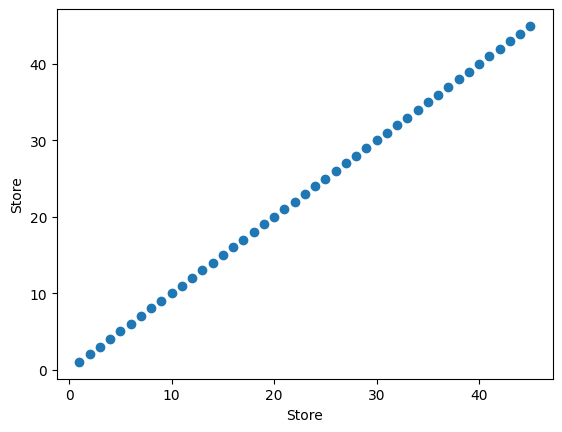

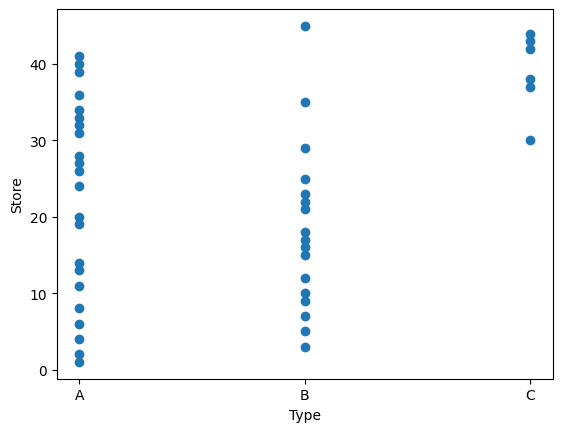

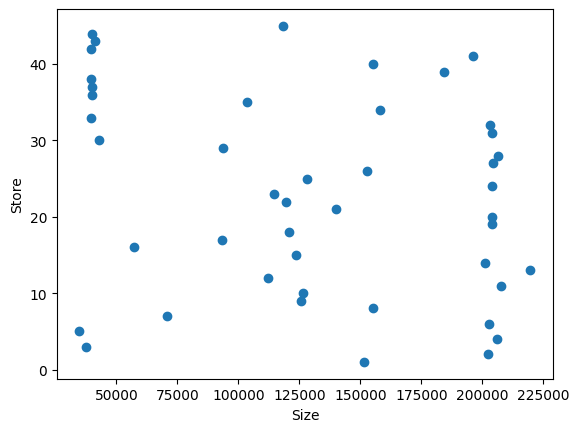

In [106]:
for i in stores.columns:
  plt.scatter(stores[i],stores['Store'])
  plt.xlabel(i)
  plt.ylabel("Store")
  plt.show()

<Axes: xlabel='Store', ylabel='Unemployment'>

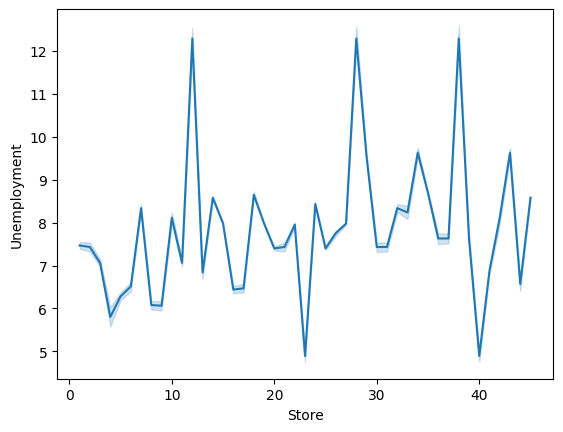

In [107]:
sns.lineplot(x=features.Store,y=features.Unemployment)

<Axes: xlabel='Store', ylabel='Unemployment'>

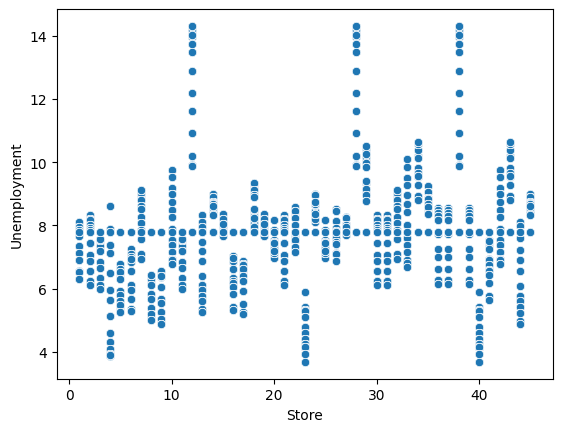

In [108]:
sns.scatterplot(x=features.Store,y=features.Unemployment)

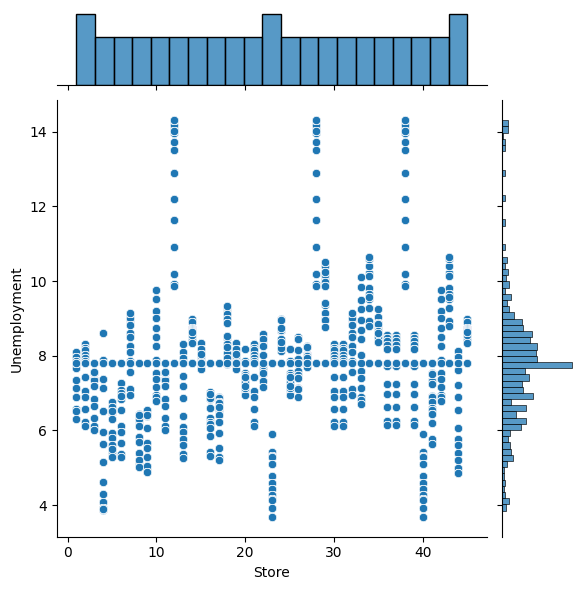

In [109]:
sns.jointplot(x='Store',y='Unemployment',data=features)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


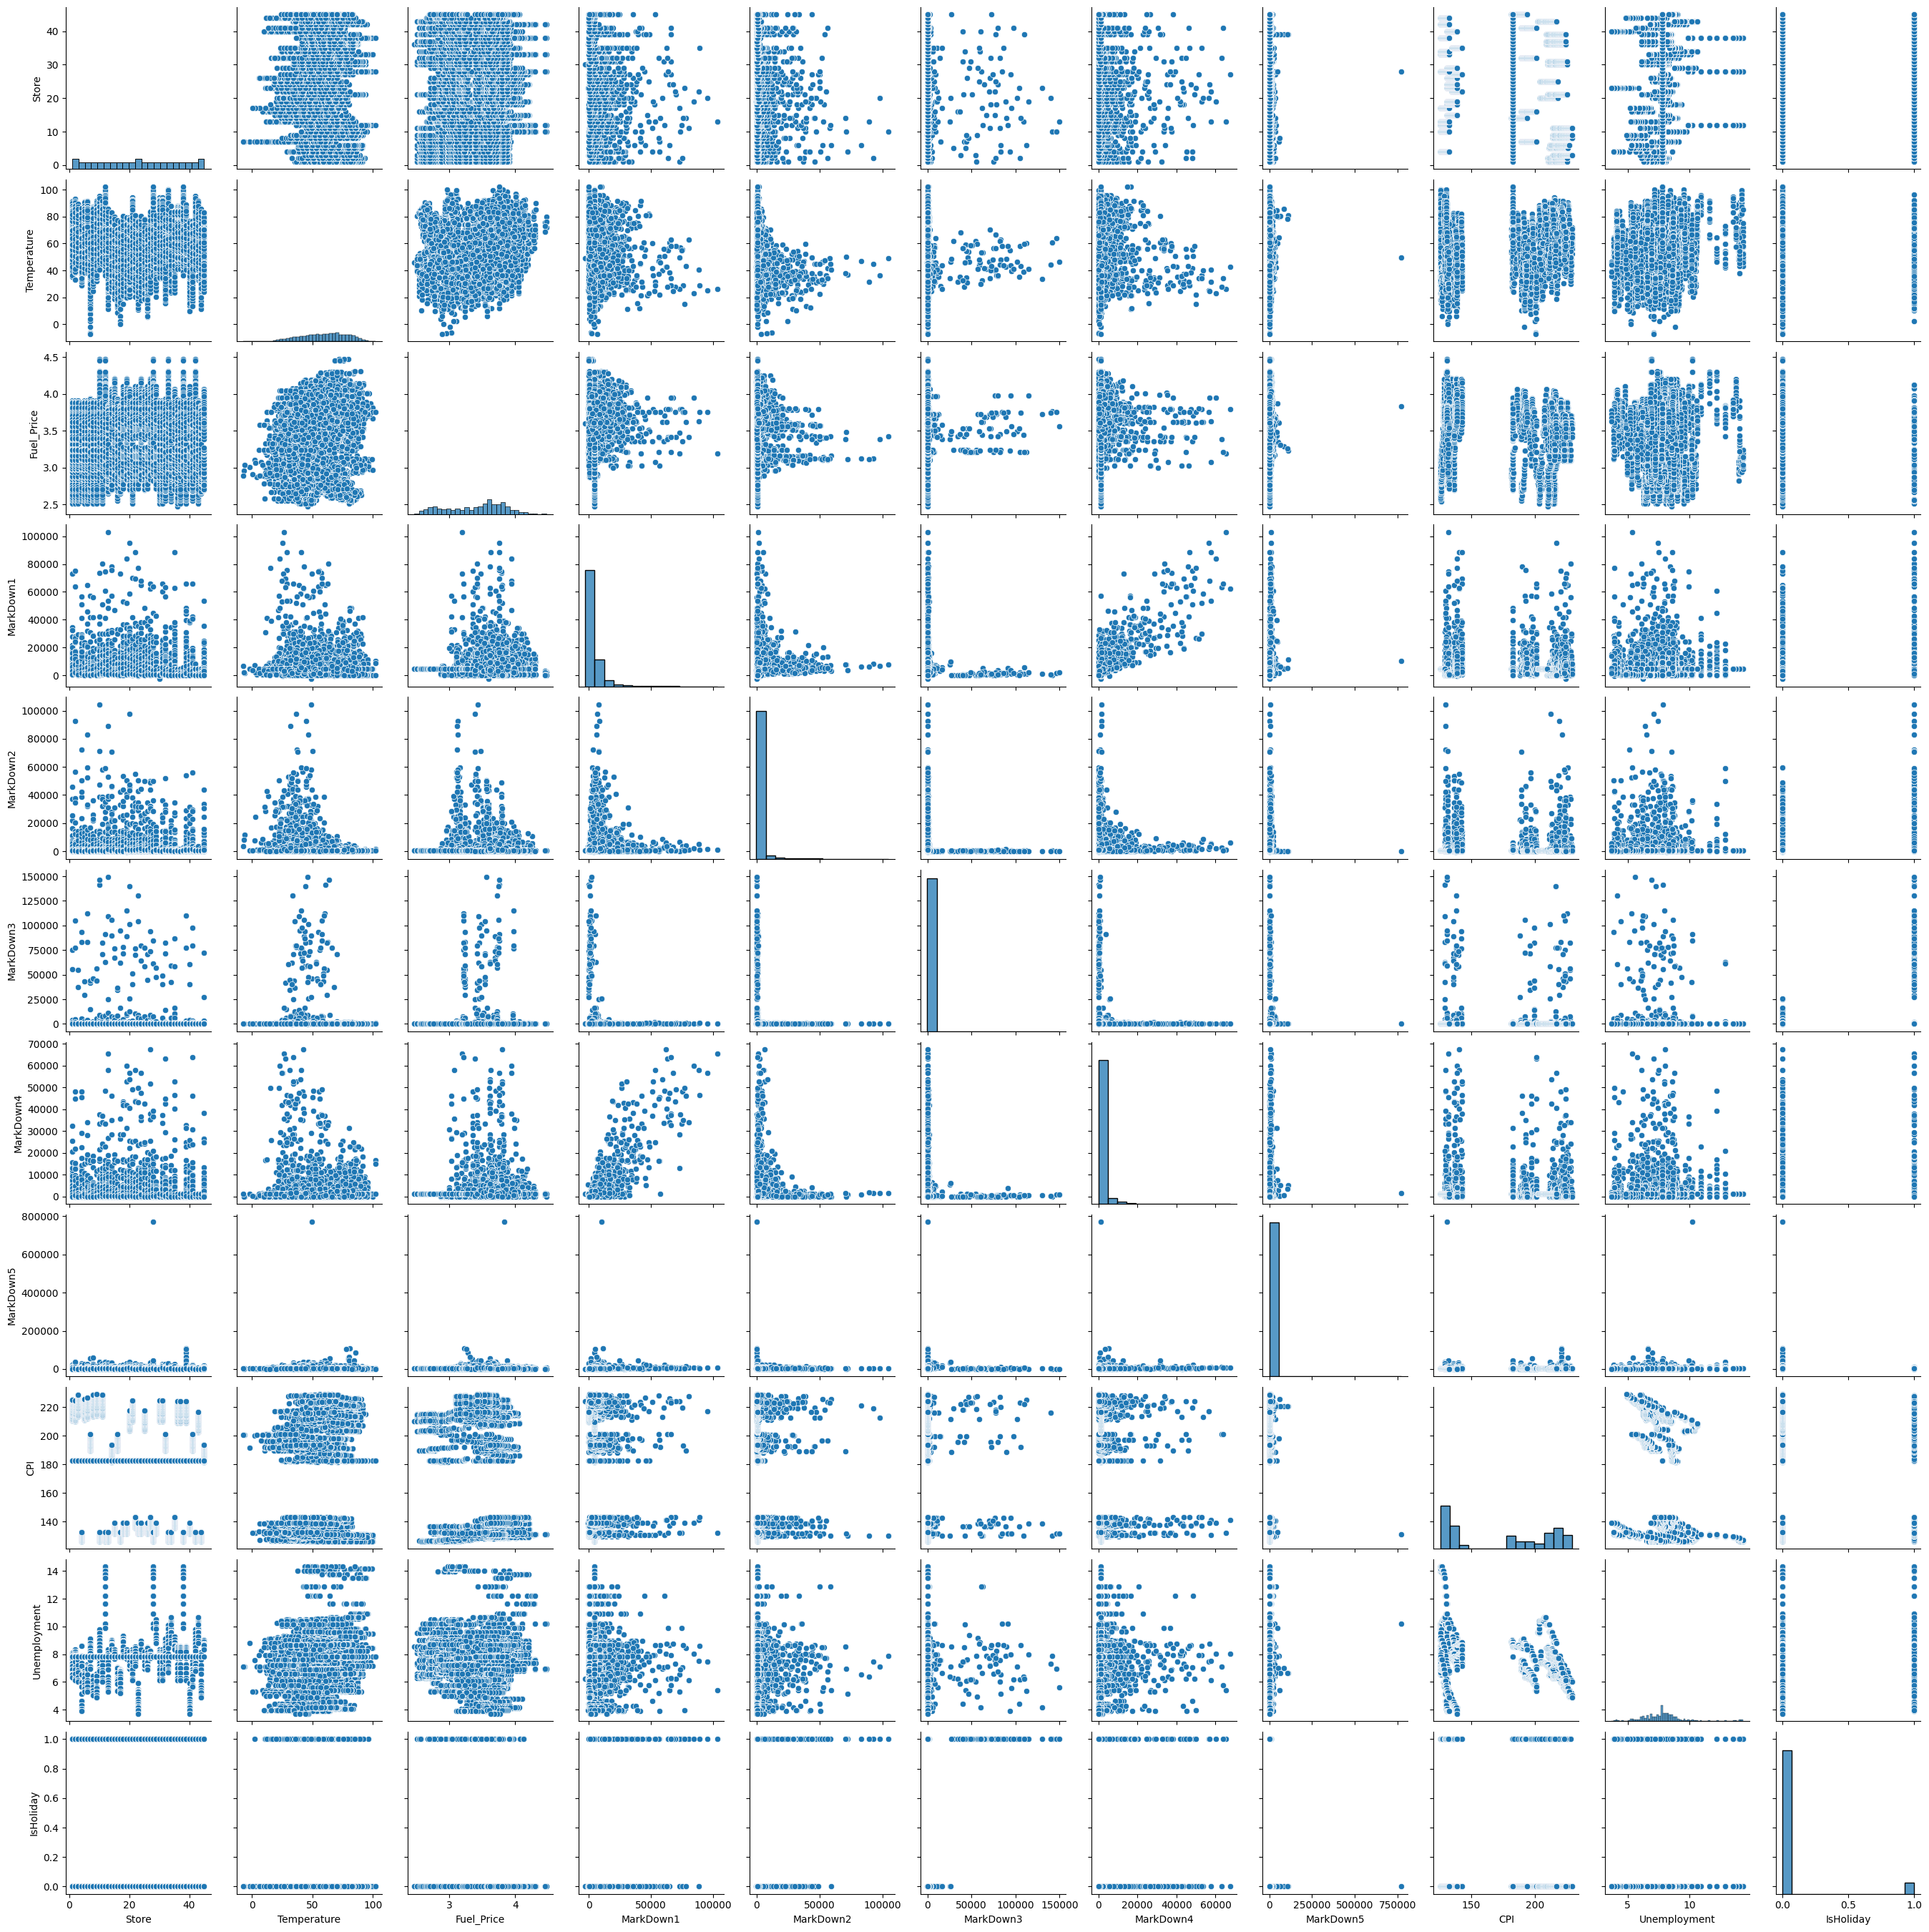

In [110]:
sns.pairplot(features)

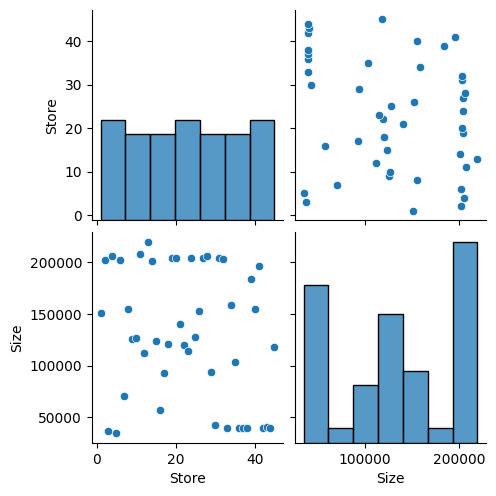

In [111]:
sns.pairplot(stores)

<ipython-input-112-425e967b5c47>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot =True,)


<Axes: >

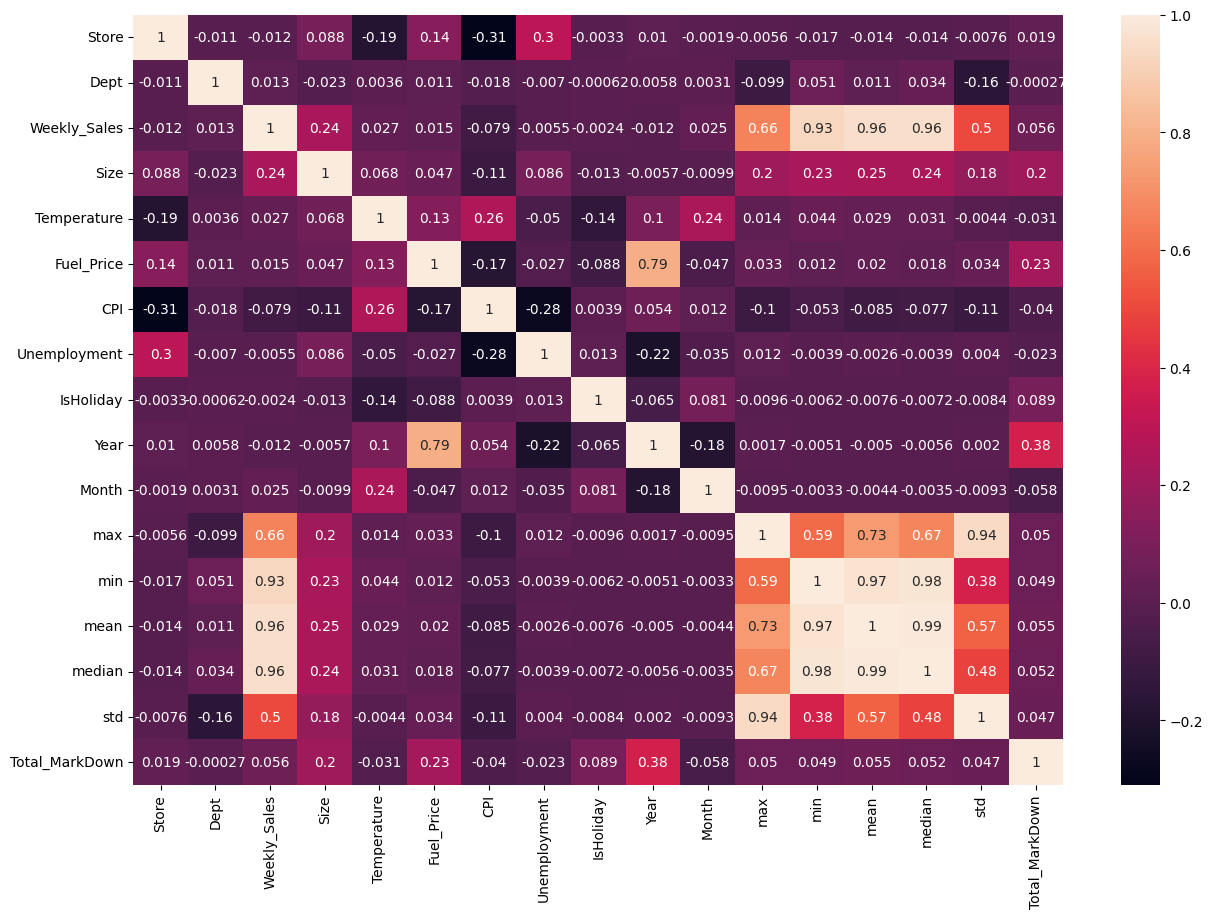

In [112]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot =True,)

<ipython-input-113-fb8bad81c04b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(features.corr(),annot =True,)


<Axes: >

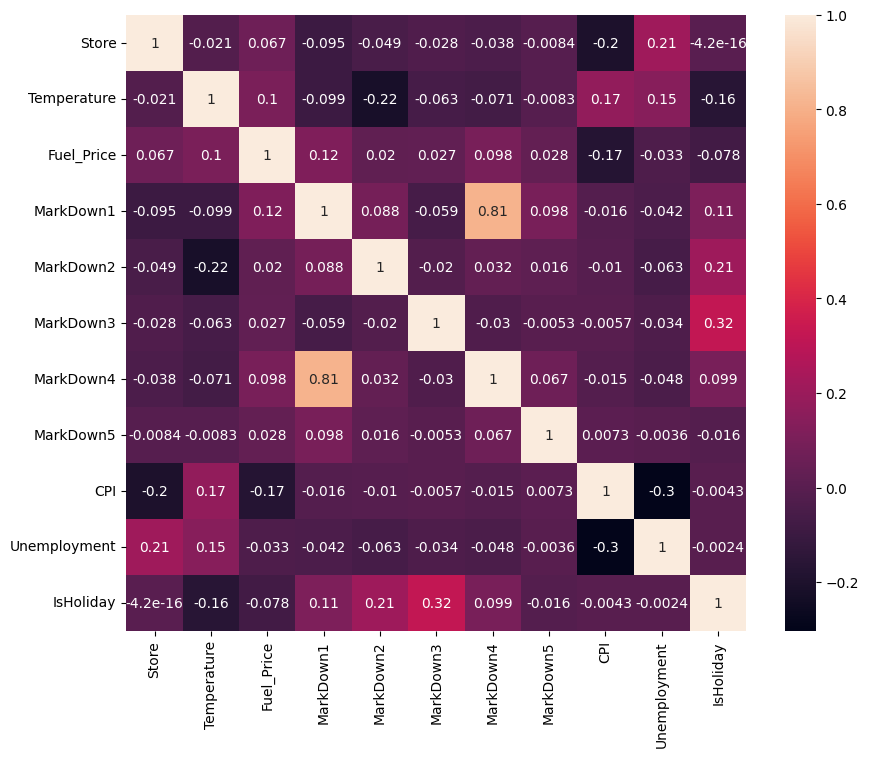

In [113]:
plt.figure(figsize=(10,8))
sns.heatmap(features.corr(),annot =True,)

<ipython-input-114-ae34c300d5d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stores.corr(),annot =True,)


<Axes: >

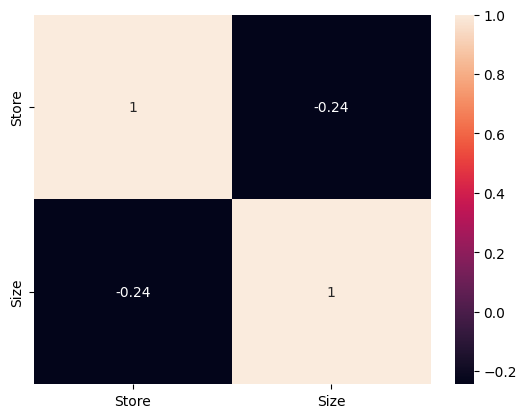

In [114]:
sns.heatmap(stores.corr(),annot =True,)

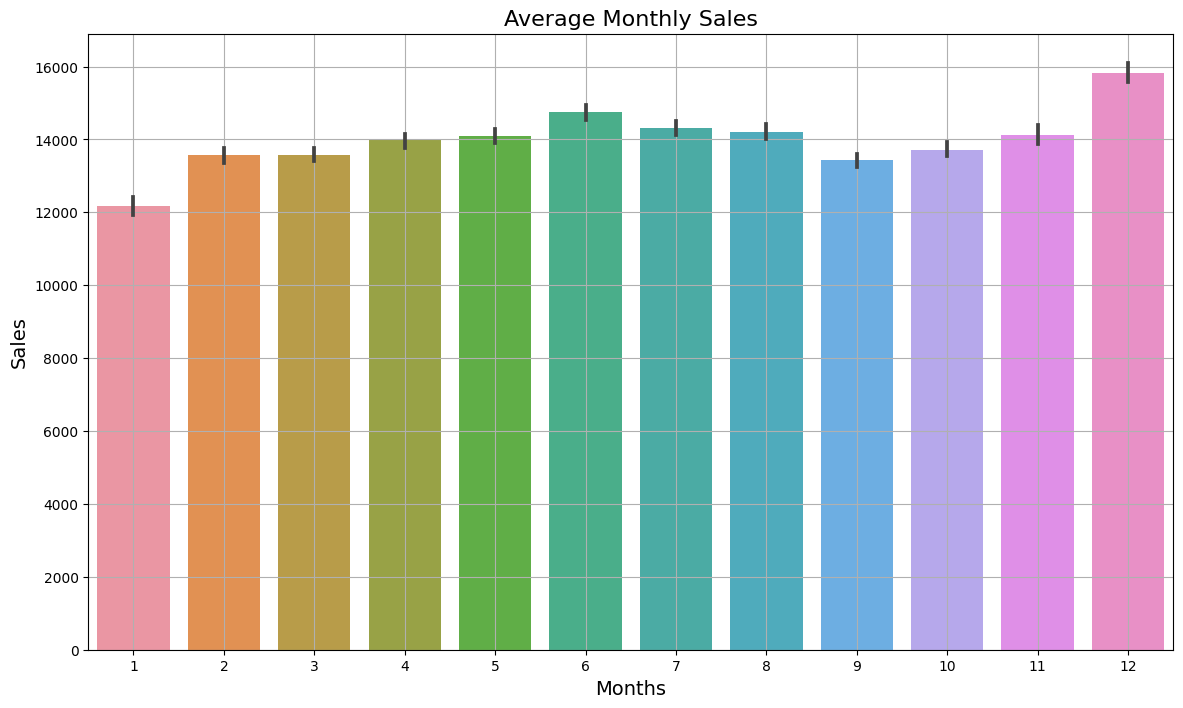

In [115]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

In [116]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.059312e+08,1.067045e+08,1.380337e+08,1.107994e+08,1.150212e+08,1.396757e+08,1.121538e+08,1.058738e+08,1.326475e+08,1.132117e+08,1.535917e+08
2011,89760712.39,1.039903e+08,1.048341e+08,1.358187e+08,1.084965e+08,1.144005e+08,1.383723e+08,1.100920e+08,1.301108e+08,1.085530e+08,8.009670e+07,1.254394e+08
2012,91542708.60,7.473501e+07,1.352790e+08,1.180179e+08,1.183619e+08,1.518994e+08,1.168568e+08,1.304974e+08,1.123273e+08,1.170338e+08,NaN,NaN


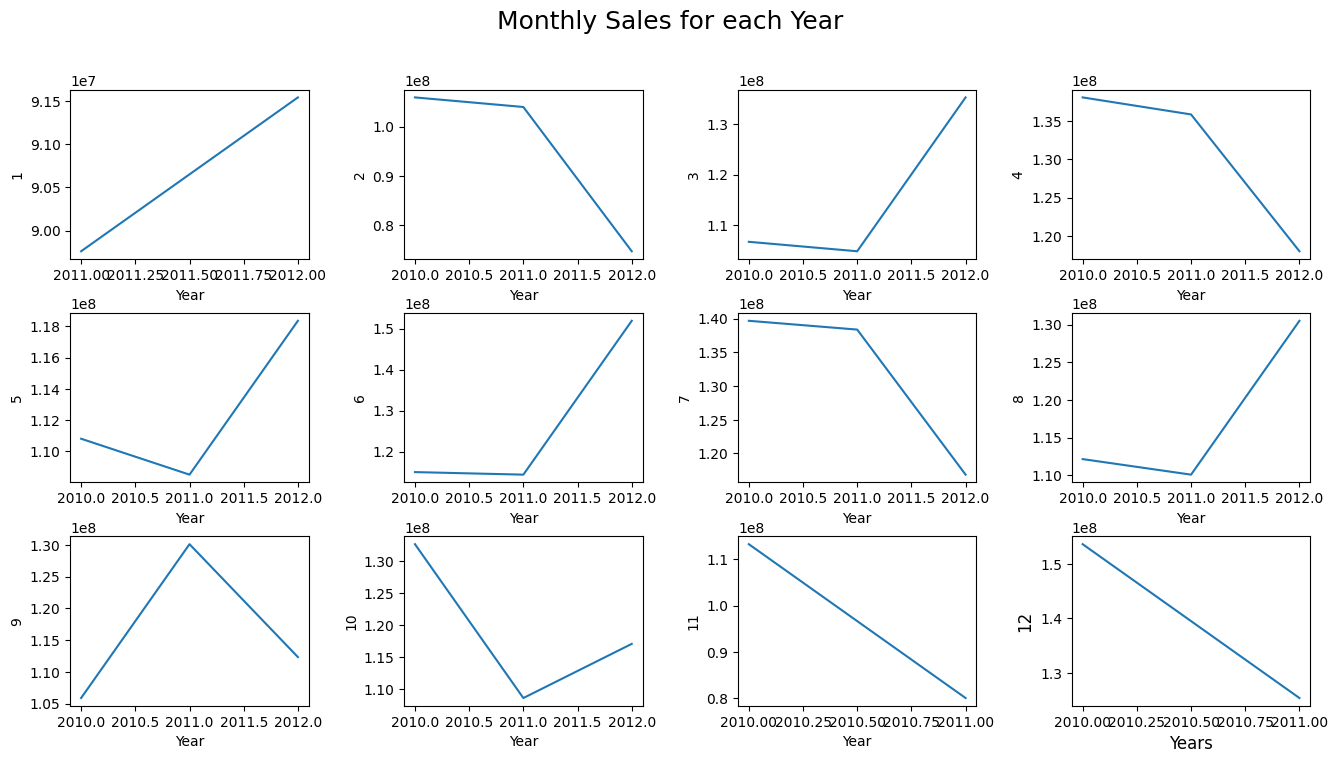

In [117]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show()

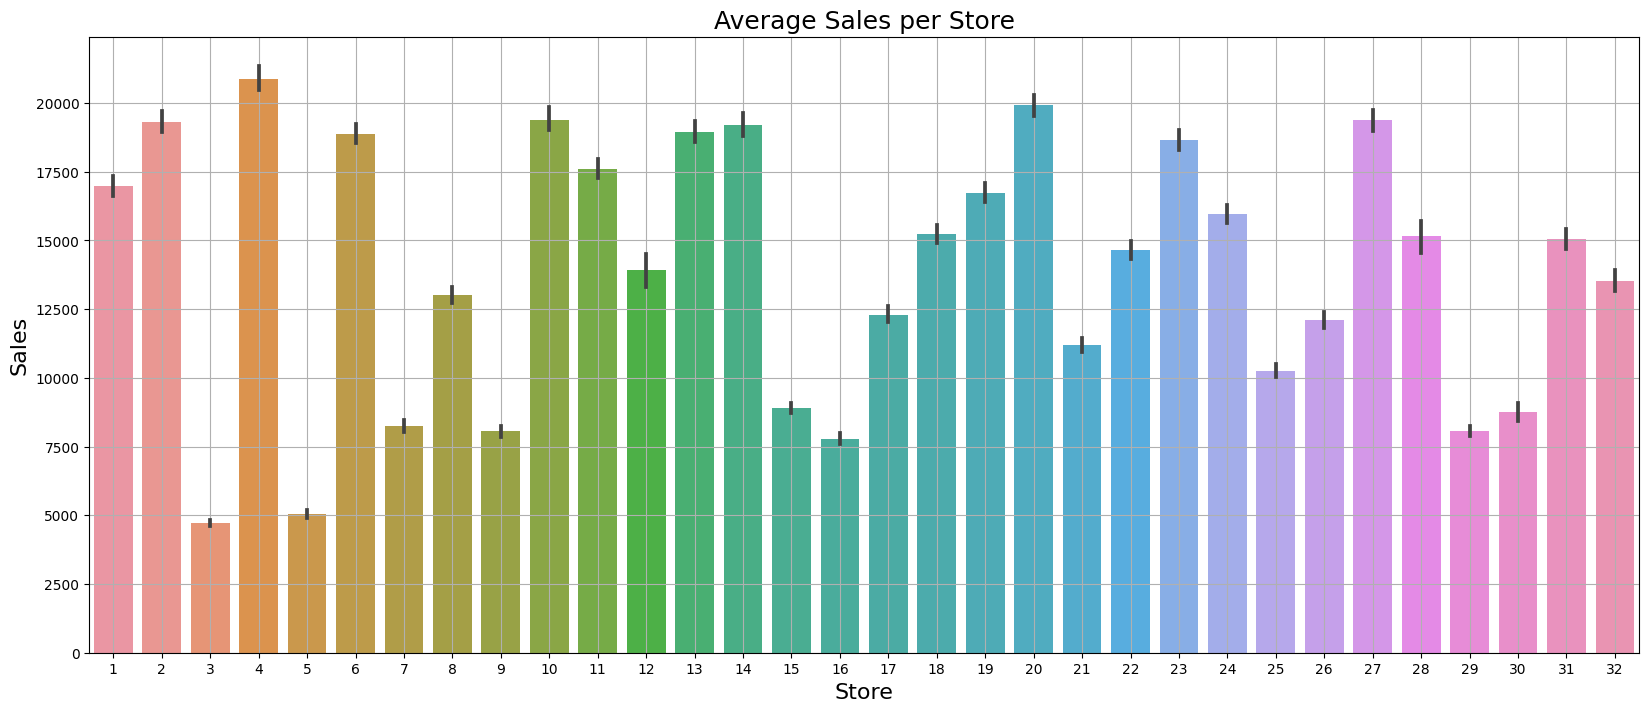

In [118]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

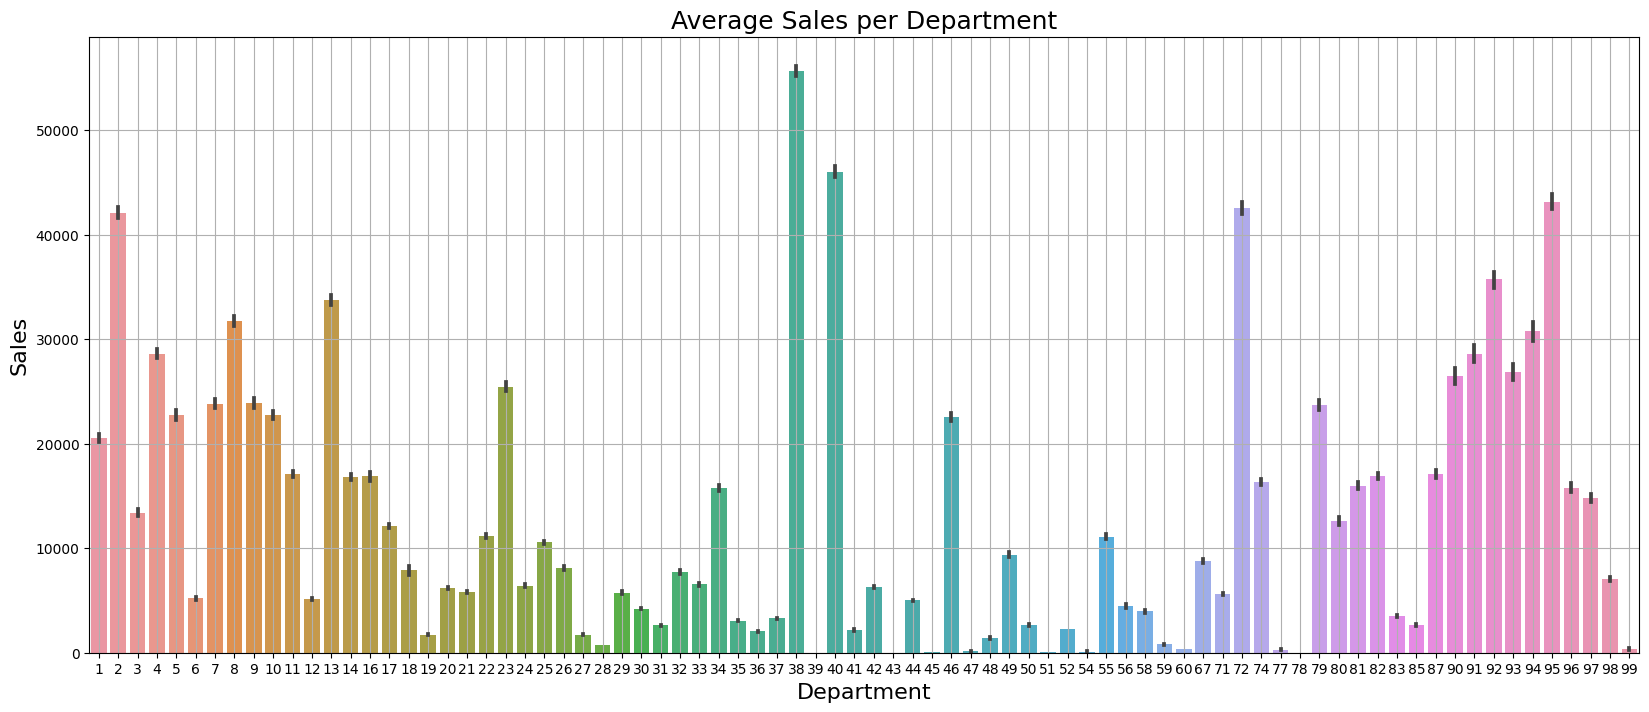

In [119]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

<ipython-input-120-6fa06d0c5fa6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])


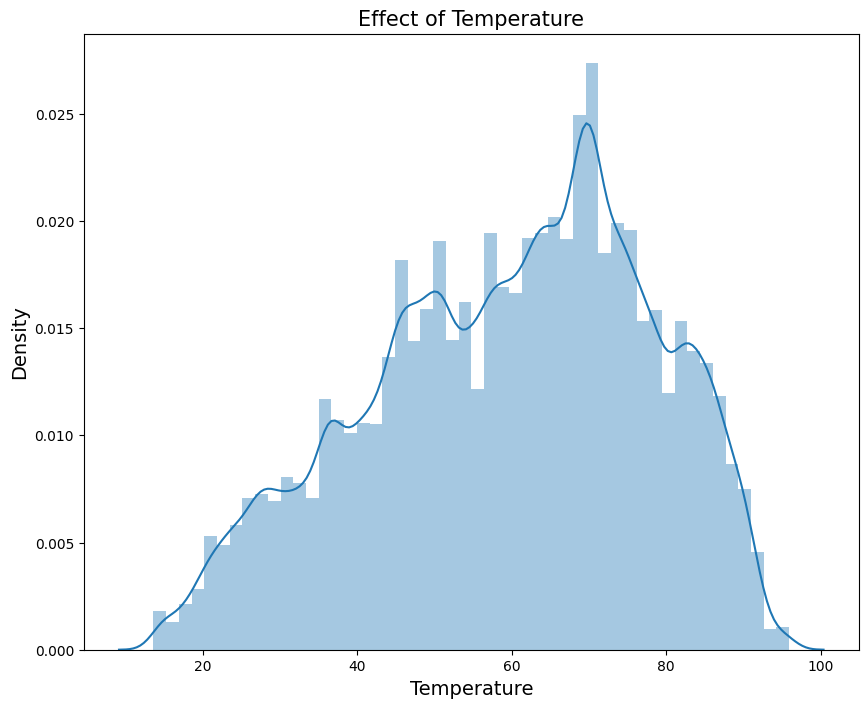

In [120]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

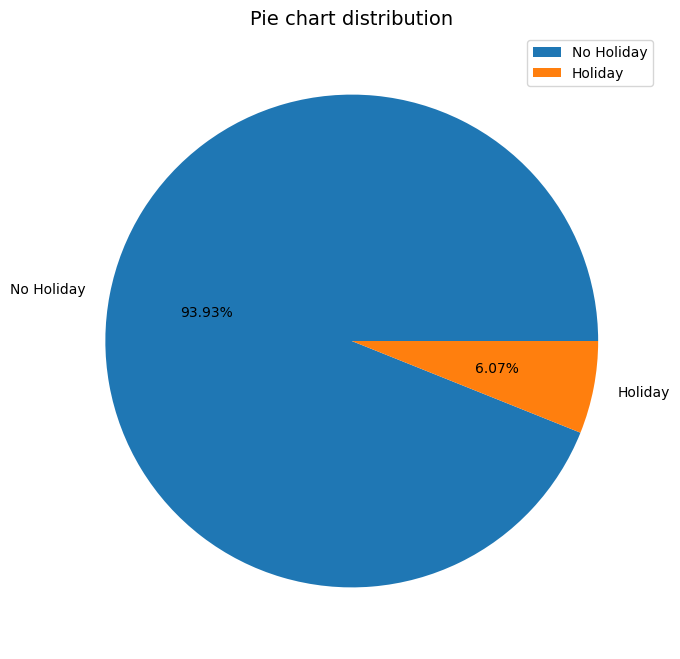

In [121]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

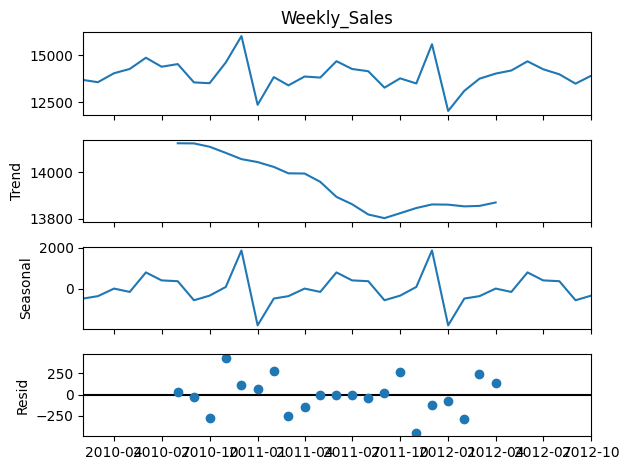

In [122]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

##Label encoding

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [124]:
data.IsHoliday = le.fit_transform(data.IsHoliday)

In [125]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,57592.12,14537.37,22513.322937,18535.48,9854.349032,9047.97
2010-02-05,29,52,2010-02-05,1050.92,B,93638,24.36,2.788,131.527903,10.064,0,2010,2,1701.59,510.26,959.371469,919.58,244.646500,9047.97
2010-02-05,5,7,2010-02-05,4401.08,B,34875,39.70,2.572,211.653972,6.566,0,2010,2,29195.62,3161.84,6124.484336,5005.53,3914.641292,9047.97
2010-02-05,3,91,2010-02-05,166.19,B,37392,45.71,2.572,214.424881,7.368,0,2010,2,867.02,65.04,318.685594,302.71,144.413199,9047.97
2010-02-05,30,60,2010-02-05,915.20,C,42988,39.05,2.572,210.752605,8.324,0,2010,2,1900.80,325.60,696.250350,642.40,235.916337,9047.97


In [126]:
data.corr()

<ipython-input-126-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,max,min,mean,median,std,Total_MarkDown
Store,1.000000,-0.010849,-0.012112,0.088434,-0.186299,0.135685,-0.309503,0.297145,-0.003277,0.010179,-0.001867,-0.005578,-0.017431,-0.014136,-0.014043,-0.007644,0.019043
Dept,-0.010849,1.000000,0.012746,-0.022690,0.003604,0.010749,-0.018366,-0.007035,-0.000616,0.005786,0.003115,-0.098566,0.050751,0.011244,0.034128,-0.158976,-0.000267
Weekly_Sales,-0.012112,0.012746,1.000000,0.236990,0.026636,0.015435,-0.079477,-0.005523,-0.002400,-0.012300,0.024587,0.660541,0.931345,0.956197,0.955823,0.500840,0.055615
Size,0.088434,-0.022690,0.236990,1.000000,0.068157,0.047419,-0.107373,0.086474,-0.013412,-0.005743,-0.009927,0.203283,0.234658,0.246447,0.238467,0.179785,0.204278
Temperature,-0.186299,0.003604,0.026636,0.068157,1.000000,0.127648,0.258688,-0.049888,-0.137307,0.100188,0.243808,0.013690,0.044404,0.029021,0.031132,-0.004402,-0.030557
Fuel_Price,0.135685,0.010749,0.015435,0.047419,0.127648,1.000000,-0.173006,-0.026915,-0.087734,0.794501,-0.047277,0.032779,0.011778,0.020284,0.017527,0.034070,0.225771
CPI,-0.309503,-0.018366,-0.079477,-0.107373,0.258688,-0.173006,1.000000,-0.275391,0.003853,0.054276,0.012257,-0.100395,-0.052524,-0.084531,-0.077101,-0.107972,-0.039800
Unemployment,0.297145,-0.007035,-0.005523,0.086474,-0.049888,-0.026915,-0.275391,1.000000,0.012740,-0.215315,-0.034534,0.011982,-0.003868,-0.002575,-0.003891,0.004008,-0.022525
IsHoliday,-0.003277,-0.000616,-0.002400,-0.013412,-0.137307,-0.087734,0.003853,0.012740,1.000000,-0.065328,0.080606,-0.009642,-0.006205,-0.007615,-0.007185,-0.008379,0.088730
Year,0.010179,0.005786,-0.012300,-0.005743,0.100188,0.794501,0.054276,-0.215315,-0.065328,1.000000,-0.182771,0.001651,-0.005136,-0.005021,-0.005595,0.001959,0.375537


In [127]:
data.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,max,min,mean,median,std,Total_MarkDown
count,275026.000000,275026.000000,275026.000000,275026.000000,275026.000000,275026.000000,275026.000000,275026.000000,275026.000000,275026.000000,275026.000000,275026.000000,275026.000000,275026.000000,275026.000000,275026.000000,275026.000000
mean,16.080218,42.556242,13999.259744,145126.535644,59.584737,3.357291,175.613875,7.544399,0.060696,2010.968068,6.431930,33438.060520,8953.854608,14320.224122,13444.864243,3965.463045,11359.598543
std,9.098759,29.405595,16243.227552,56863.062409,18.194287,0.467245,39.436559,1.278036,0.238772,0.803496,3.177396,44401.507771,11993.873708,16293.551656,15828.390600,5555.834418,6680.275163
min,1.000000,1.000000,0.000000,34875.000000,13.640000,2.514000,126.064000,3.879000,0.000000,2010.000000,1.000000,0.020000,-4988.940000,-116.454545,-52.000000,0.000000,567.350000
25%,8.000000,18.000000,2530.792500,114533.000000,46.400000,2.899000,133.849226,6.697000,0.000000,2010.000000,4.000000,6929.100000,907.910000,2876.399441,2458.500000,889.957192,9047.970000
50%,16.000000,35.000000,7775.720000,140167.000000,61.830000,3.461000,190.571326,7.671000,0.000000,2011.000000,6.000000,19679.040000,4152.480000,8221.684126,7533.170000,2144.422698,9047.970000
75%,24.000000,67.000000,19503.137500,203742.000000,73.510000,3.743000,214.704919,8.239000,0.000000,2012.000000,9.000000,44511.830000,11730.960000,19838.849231,18412.180000,4644.738551,9047.970000
max,32.000000,99.000000,76996.410000,219622.000000,95.910000,4.468000,227.232807,12.187000,1.000000,2012.000000,12.000000,474330.100000,76373.710000,108598.364126,107690.800000,52070.686993,45791.750000


##Data Splitted into Training, Validation, Test

In [128]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 275026 entries, 2010-02-05 to 2012-10-26
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           275026 non-null  int64         
 1   Dept            275026 non-null  int64         
 2   Date            275026 non-null  datetime64[ns]
 3   Weekly_Sales    275026 non-null  float64       
 4   Type            275026 non-null  object        
 5   Size            275026 non-null  int64         
 6   Temperature     275026 non-null  float64       
 7   Fuel_Price      275026 non-null  float64       
 8   CPI             275026 non-null  float64       
 9   Unemployment    275026 non-null  float64       
 10  IsHoliday       275026 non-null  int64         
 11  Year            275026 non-null  int64         
 12  Month           275026 non-null  int64         
 13  max             275026 non-null  float64       
 14  min             2750

In [130]:
X=X[["Store","Dept","Size","Temperature","IsHoliday","Year",'Month']]

In [131]:
y = y.values.reshape(-1,1)

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

##Random Forest Model

In [133]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [134]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  96.57346833520157


In [135]:
y_pred = rf.predict(X_test)

In [136]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 1481.7216206262044
MSE 9122913.598697275
RMSE 3020.416130055141
R2 0.9657347418014797


In [137]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df

,Actual,Predicted
Date,,
2012-03-16,59054.07,58770.1939
2011-04-22,4850.20,5428.0181
2012-09-21,5644.43,5072.3403
2012-02-10,13591.99,13468.3197
2011-02-04,23525.37,27652.7543
...,...,...
2011-06-10,17220.18,17218.8828
2012-01-20,37316.42,40551.6375
2010-02-26,12047.64,17048.3549


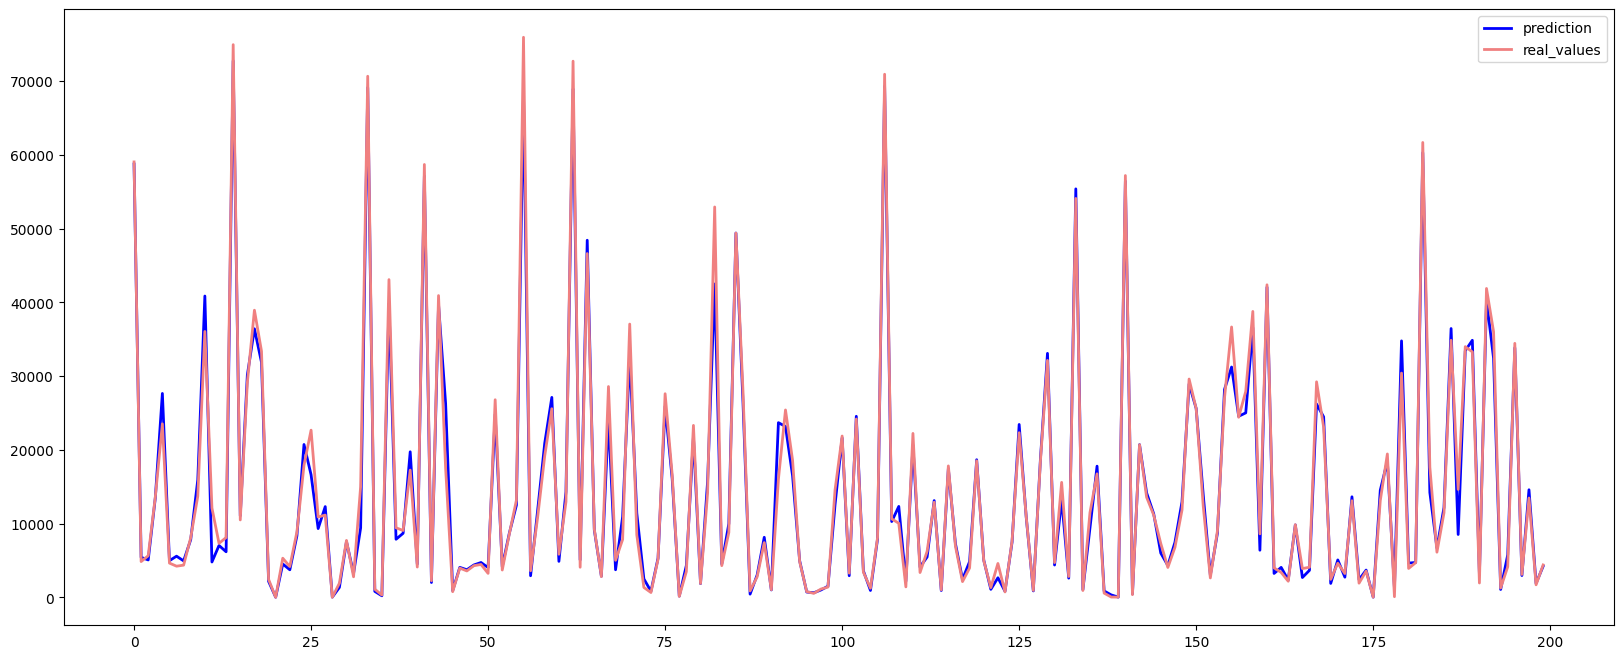

In [138]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [139]:
pickle.dump(rf,open('random_forest.pkl','wb'))

##XGBoost Model

In [140]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [141]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  94.22941870205291


In [142]:
y_pred = xgbr.predict(X_test)

In [143]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 2450.055596192737
MSE 15363790.487115387
RMSE 3919.6671398366707
R2 0.9422979378584959


In [144]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df

,Actual,Predicted
Date,,
2012-03-16,59054.07,45667.382812
2011-04-22,4850.20,4148.082031
2012-09-21,5644.43,4636.672363
2012-02-10,13591.99,13110.385742
2011-02-04,23525.37,29116.300781
...,...,...
2011-06-10,17220.18,23097.917969
2012-01-20,37316.42,48966.082031
2010-02-26,12047.64,11171.484375


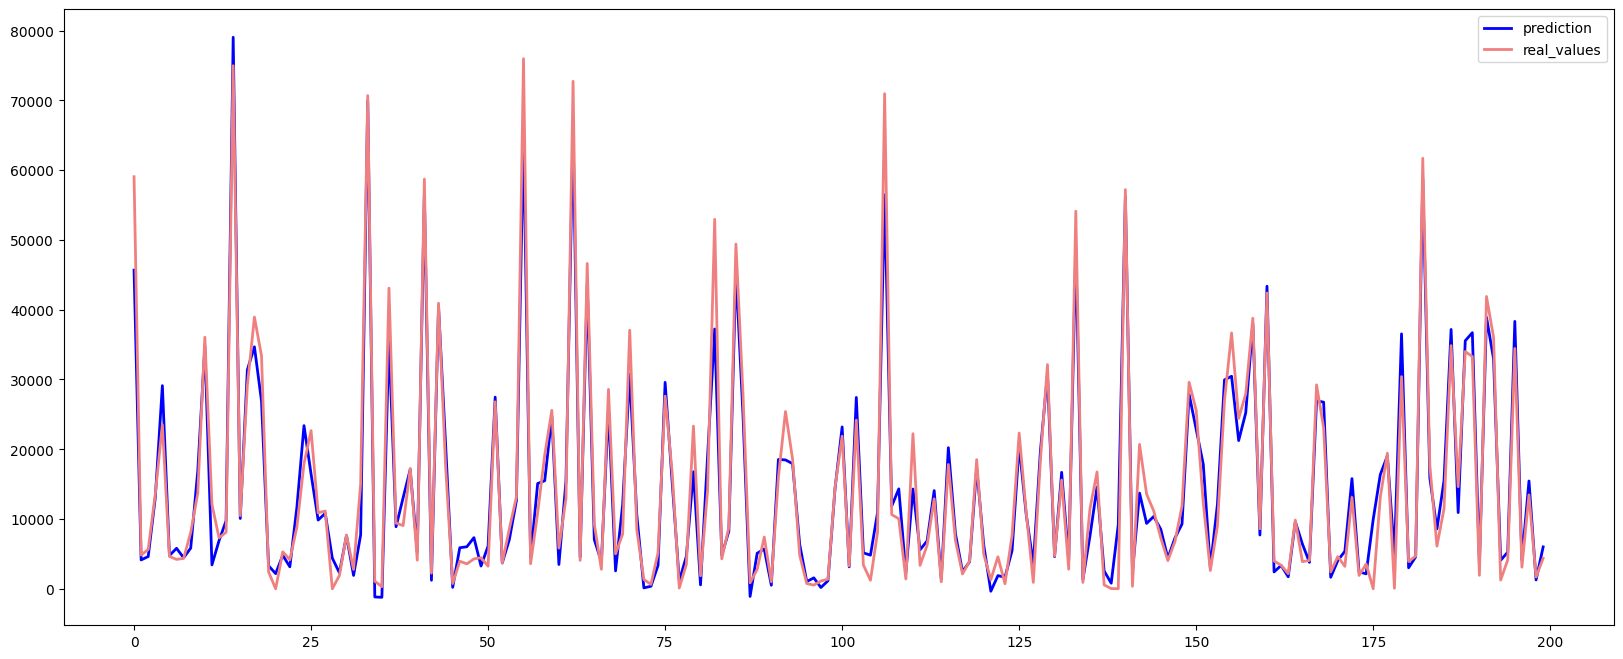

In [145]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()


In [146]:
pickle.dump(xgbr,open('xgboost.pkl','wb'))

##Comparing Models

In [147]:
acc = {'model':['randomforest','xgboost'],'accuracy':[rf_acc,xgb_acc]}

In [148]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,randomforest,96.573468
1,xgboost,94.229419


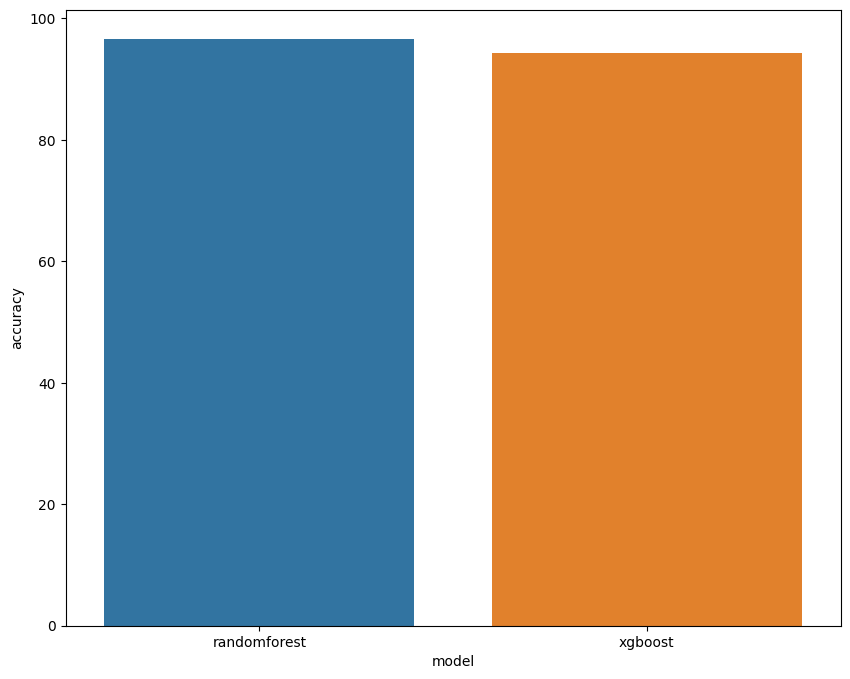

In [149]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.show()